# # [Entrega #1] Análisis Exploratorio de Datos

## Descripción
En este proyecto, realizaré un análisis exploratorio de los datos proporcionados. El objetivo es entender la estructura, distribución y relaciones entre las variables para preparar los datos para el modelado posterior.

## Contenido
- Exploración inicial de los datos
- Análisis de valores faltantes
- Estadísticas descriptivas
- Visualización de distribuciones
- Análisis de correlaciones
- Identificación de outliers
- Conclusiones preliminares

## Datos
Los datos contienen información sobre rendimiento académico clasificado en diferentes categorías (bajo, medio-bajo, medio-alto, alto).

## Herramientas utilizadas
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn


In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display


In [4]:
# Configuración para visualización
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

In [5]:
def cargar_dataset(ruta_archivo, nombre="Dataset"):
    """
    Función para cargar un dataset CSV y mostrar información básica
    
    Args:
        ruta_archivo (str): Ruta al archivo CSV
        nombre (str): Nombre descriptivo del dataset
    
    Returns:
        DataFrame: El dataset cargado
    """
    # Verificar si el archivo existe
    if not os.path.exists(ruta_archivo):
        print(f"Error: El archivo {ruta_archivo} no existe.")
        return None
    
    try:
        # Cargar el archivo CSV con pandas
        df = pd.read_csv(ruta_archivo)
        
        # Mostrar información básica
        print(f"\n{'='*50}")
        print(f"INFORMACIÓN DEL DATASET: {nombre}")
        print(f"{'='*50}")
        print(f"Número de filas: {df.shape[0]}")
        print(f"Número de columnas: {df.shape[1]}")
        print(f"Columnas: {', '.join(df.columns)}")
        
        # Mostrar las primeras filas
        print(f"\nPrimeras 5 filas de {nombre}:")
        display(df.head())
        
        return df
    
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
        return None

# Cargar los datasets
print("Cargando datasets...")
train_df = cargar_dataset("Data/train.csv", "Train Dataset")
test_df = cargar_dataset("Data/test.csv", "Test Dataset")

Cargando datasets...

INFORMACIÓN DEL DATASET: Train Dataset
Número de filas: 692448
Número de columnas: 6
Columnas: profesional completa, bajo, 0.573, 0.117, 0.236, 0.144

Primeras 5 filas de Train Dataset:


,,,,,,,,,,,,,,,profesional completa,bajo,0.573,0.117,0.236,0.144
907719,20203,ECONOMIA,BOGOTÁ,Más de 7 millones,0,Estrato 4,Si,Postgrado,Si,Si,N,No,Si,Si,Educación profesional completa,alto,0.465,0.180,0.262,0.209
942415,20203,TRABAJO SOCIAL,BOYACA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) incompleta,Si,No,N,Si,Si,Si,Primaria incompleta,medio-alto,0.207,0.290,0.277,0.293
689351,20183,INGENIERIA DE PROCESOS INDUSTRIALES,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Técnica o tecnológica incompleta,medio-alto,0.225,0.293,0.257,0.322
663184,20195,INGENIERIA CIVIL,TOLIMA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,NaN,Si,Técnica o tecnológica incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.017,0.048,0.028,0.029
373408,20195,ADMINISTRACIÓN DE EMPRESAS,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Primaria incompleta,medio-bajo,0.205,0.291,0.304,0.323



INFORMACIÓN DEL DATASET: Test Dataset
Número de filas: 296786
Número de columnas: 20
Columnas: ID, PERIODO, ESTU_PRGM_ACADEMICO, ESTU_PRGM_DEPARTAMENTO, ESTU_VALORMATRICULAUNIVERSIDAD, ESTU_HORASSEMANATRABAJA, FAMI_ESTRATOVIVIENDA, FAMI_TIENEINTERNET, FAMI_EDUCACIONPADRE, FAMI_TIENELAVADORA, FAMI_TIENEAUTOMOVIL, ESTU_PRIVADO_LIBERTAD, ESTU_PAGOMATRICULAPROPIO, FAMI_TIENECOMPUTADOR, FAMI_TIENEINTERNET.1, FAMI_EDUCACIONMADRE, coef_1, coef_2, coef_3, coef_4

Primeras 5 filas de Test Dataset:


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


In [6]:
def analizar_tipos_y_nulos(df, nombre="Dataset"):
    """
    Analiza los tipos de datos y valores nulos en el dataset
    
    Args:
        df (DataFrame): Dataset a analizar
        nombre (str): Nombre descriptivo del dataset
    """
    if df is None:
        return
    
    print(f"\n{'='*50}")
    print(f"ANÁLISIS DE TIPOS Y VALORES NULOS: {nombre}")
    print(f"{'='*50}")
    
    # Información sobre tipos de datos
    print("\nInformación sobre tipos de datos:")
    # Usar io.StringIO en lugar de pd.io.StringIO
    from io import StringIO
    buffer = StringIO()
    df.info(buf=buffer)
    print(buffer.getvalue())
    
    # Estadísticas descriptivas básicas
    print("\nEstadísticas descriptivas básicas:")
    display(df.describe(include='all').T)
    
    # Verificar valores nulos
    print("\nValores nulos por columna:")
    nulos = pd.DataFrame(df.isnull().sum(), columns=['Valores nulos'])
    nulos['Porcentaje (%)'] = (df.isnull().sum() / len(df) * 100).round(2)
    display(nulos[nulos['Valores nulos'] > 0])  # Solo mostrar columnas con valores nulos

# Analizar tipos de datos y valores nulos
if train_df is not None:
    analizar_tipos_y_nulos(train_df, "Train Dataset")



ANÁLISIS DE TIPOS Y VALORES NULOS: Train Dataset

Información sobre tipos de datos:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 692448 entries, (np.int64(907719), np.int64(20203), 'ECONOMIA', 'BOGOTÁ', 'Más de 7 millones', '0', 'Estrato 4', 'Si', 'Postgrado', 'Si', 'Si', 'N', 'No', 'Si', 'Si') to (np.int64(933374), np.int64(20195), 'PSICOLOGIA', 'ANTIOQUIA', 'Entre 5.5 millones y menos de 7 millones', 'Más de 30 horas', 'Estrato 4', 'Si', 'Secundaria (Bachillerato) completa', 'Si', 'Si', 'N', 'No', 'Si', 'Si')
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   profesional completa  668787 non-null  object 
 1   bajo                  692448 non-null  object 
 2   0.573                 692448 non-null  float64
 3   0.117                 692448 non-null  float64
 4   0.236                 692448 non-null  float64
 5   0.144                 692448 non-null  float64
dtypes: float64(4), object(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
profesional completa,668787,12,Secundaria (Bachillerato) completa,141734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bajo,692448,4,alto,175609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.573,692448.0,NaN,NaN,NaN,0.26863,0.12213,0.0,0.203,0.24,0.314,0.657
0.117,692448.0,NaN,NaN,NaN,0.259996,0.09348,0.0,0.212,0.271,0.309,0.487
0.236,692448.0,NaN,NaN,NaN,0.262087,0.058862,0.0,0.254,0.276,0.293,0.32
0.144,692448.0,NaN,NaN,NaN,0.262904,0.067944,0.0,0.255,0.285,0.303,0.332



Valores nulos por columna:


,Valores nulos,Porcentaje (%)
profesional completa,23661,3.42


In [7]:
def analizar_variable_objetivo(df):
    """
    Analiza la distribución de la variable objetivo RENDIMIENTO_GLOBAL
    
    Args:
        df (DataFrame): Dataset con la variable objetivo
    """
    if df is None or 'RENDIMIENTO_GLOBAL' not in df.columns:
        print("No se encontró la variable objetivo 'RENDIMIENTO_GLOBAL' en el dataset.")
        return
    
    print(f"\n{'='*50}")
    print("ANÁLISIS DE LA VARIABLE OBJETIVO (RENDIMIENTO_GLOBAL)")
    print(f"{'='*50}")
    
    # Distribución de la variable objetivo
    rendimiento_counts = df['RENDIMIENTO_GLOBAL'].value_counts().sort_index()
    
    print("\nConteo por categoría de rendimiento:")
    display(rendimiento_counts)
    
    # Porcentaje por categoría
    print("\nPorcentaje por categoría de rendimiento:")
    porcentajes = (rendimiento_counts / rendimiento_counts.sum() * 100).round(2)
    display(pd.DataFrame({
        'Conteo': rendimiento_counts,
        'Porcentaje (%)': porcentajes
    }))
    
    # Visualización de la distribución
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='RENDIMIENTO_GLOBAL', data=df, order=rendimiento_counts.index)
    
    # Añadir etiquetas con los porcentajes
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.1,
                f'{porcentajes.iloc[i]}%',
                ha="center")
    
    plt.title('Distribución de Rendimiento Global')
    plt.xlabel('Categoría de Rendimiento')
    plt.ylabel('Número de Estudiantes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analizar la variable objetivo en el dataset de entrenamiento
if train_df is not None:
    analizar_variable_objetivo(train_df)

No se encontró la variable objetivo 'RENDIMIENTO_GLOBAL' en el dataset.



ANÁLISIS DE VARIABLES CATEGÓRICAS (Top 2)

--------------------------------------------------
Análisis de la variable: profesional completa
--------------------------------------------------

Número total de categorías: 12

Top 10 categorías más frecuentes:


,Conteo,Porcentaje (%)
profesional completa,,
Secundaria (Bachillerato) completa,141734,20.47
Primaria incompleta,99414,14.36
Técnica o tecnológica completa,89538,12.93
Educación profesional completa,85320,12.32
Secundaria (Bachillerato) incompleta,81002,11.70
Primaria completa,56122,8.10
Postgrado,46241,6.68
Técnica o tecnológica incompleta,27530,3.98
Educación profesional incompleta,22468,3.24


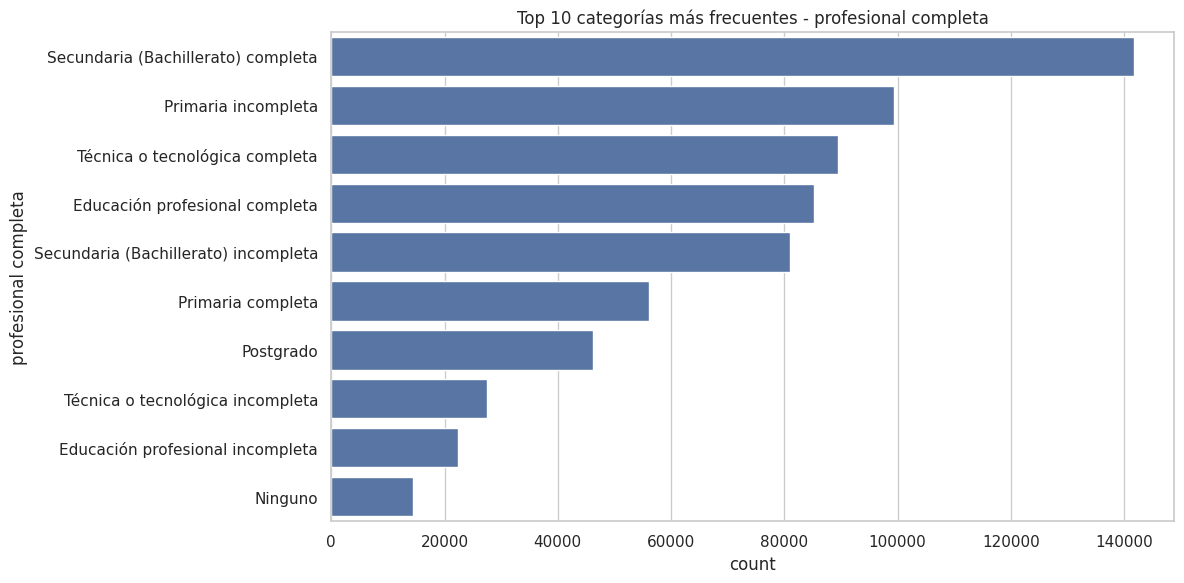


--------------------------------------------------
Análisis de la variable: bajo
--------------------------------------------------

Número total de categorías: 4

Top 10 categorías más frecuentes:


,Conteo,Porcentaje (%)
bajo,,
alto,175609,25.36
bajo,172975,24.98
medio-bajo,172258,24.88
medio-alto,171606,24.78


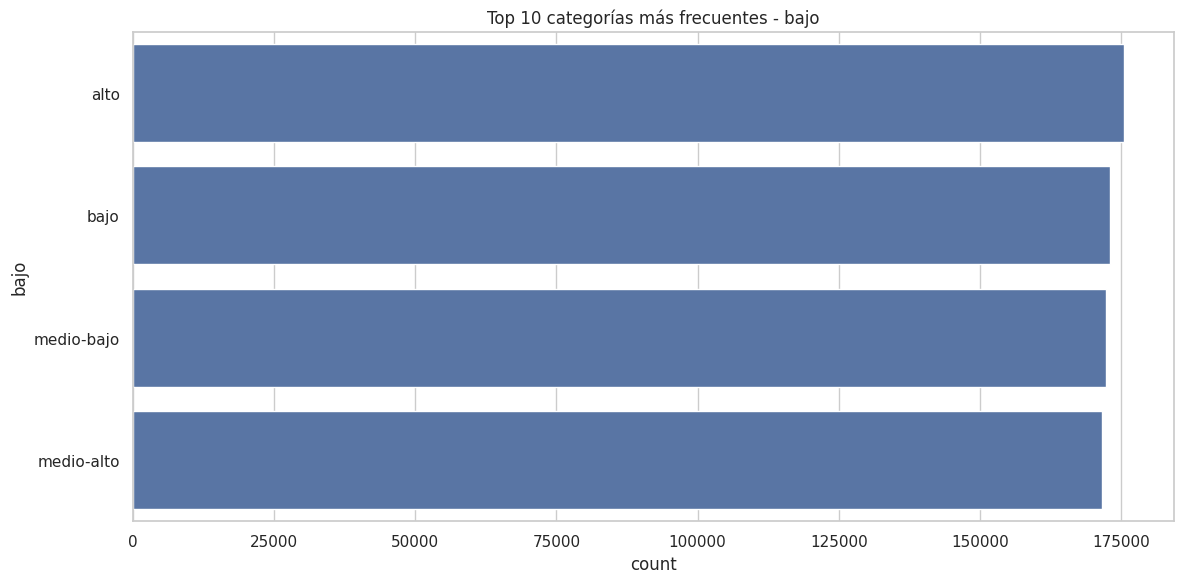

In [8]:
def analizar_variables_categoricas(df, n_vars=3):
    """
    Analiza las variables categóricas del dataset y su relación con la variable objetivo
    
    Args:
        df (DataFrame): Dataset a analizar
        n_vars (int): Número máximo de variables a analizar
    """
    if df is None:
        return
    
    # Identificar variables categóricas (excluyendo ID y la variable objetivo)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    categorical_cols = [col for col in categorical_cols if col != 'RENDIMIENTO_GLOBAL' and col != 'ID']
    
    if not categorical_cols:
        print("\nNo se encontraron variables categóricas para analizar.")
        return
    
    print(f"\n{'='*50}")
    print(f"ANÁLISIS DE VARIABLES CATEGÓRICAS (Top {min(n_vars, len(categorical_cols))})")
    print(f"{'='*50}")
    
    # Limitar el número de variables a analizar
    categorical_cols = categorical_cols[:n_vars]
    
    for col in categorical_cols:
        print(f"\n{'-'*50}")
        print(f"Análisis de la variable: {col}")
        print(f"{'-'*50}")
        
        # Distribución de la variable
        col_counts = df[col].value_counts()
        n_categories = len(col_counts)
        
        print(f"\nNúmero total de categorías: {n_categories}")
        print("\nTop 10 categorías más frecuentes:")
        
        top_categories = col_counts.head(10)
        display(pd.DataFrame({
            'Conteo': top_categories,
            'Porcentaje (%)': (top_categories / len(df) * 100).round(2)
        }))
        
        # Visualización
        plt.figure(figsize=(12, 6))
        sns.countplot(y=col, data=df, order=col_counts.index[:10])
        plt.title(f'Top 10 categorías más frecuentes - {col}')
        plt.tight_layout()
        plt.show()
        
        # Relación con la variable objetivo (si existe)
        if 'RENDIMIENTO_GLOBAL' in df.columns:
            print(f"\nRelación entre {col} y RENDIMIENTO_GLOBAL:")
            
            # Crear tabla cruzada (solo para las 10 categorías más frecuentes)
            top_cats = col_counts.head(10).index
            filtered_df = df[df[col].isin(top_cats)]
            
            cross_tab = pd.crosstab(
                filtered_df[col], 
                filtered_df['RENDIMIENTO_GLOBAL'],
                normalize='index'
            ) * 100
            
            display(cross_tab.round(2))
            
            # Visualización de la relación
            plt.figure(figsize=(14, 8))
            
            # Gráfico de barras apiladas
            cross_tab_abs = pd.crosstab(filtered_df[col], filtered_df['RENDIMIENTO_GLOBAL'])
            cross_tab_abs.plot(kind='bar', stacked=True, figsize=(14, 8))
            plt.title(f'Distribución de RENDIMIENTO_GLOBAL por {col}')
            plt.xlabel(col)
            plt.ylabel('Número de estudiantes')
            plt.xticks(rotation=45)
            plt.legend(title='RENDIMIENTO_GLOBAL')
            plt.tight_layout()
            plt.show()

# Analizar variables categóricas en el dataset de entrenamiento
if train_df is not None:
    analizar_variables_categoricas(train_df)
    
    


ANÁLISIS DE VARIABLES NUMÉRICAS (Top 3)

--------------------------------------------------
Análisis de la variable: 0.573
--------------------------------------------------

Estadísticas descriptivas:


count    692448.00000
mean          0.26863
std           0.12213
min           0.00000
25%           0.20300
50%           0.24000
75%           0.31400
max           0.65700
Name: 0.573, dtype: float64

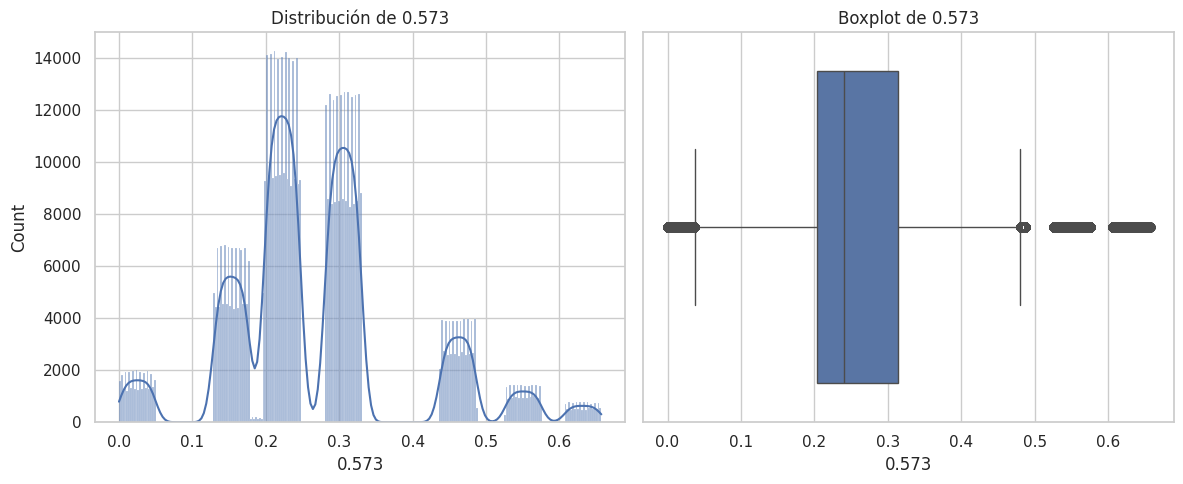


--------------------------------------------------
Análisis de la variable: 0.117
--------------------------------------------------

Estadísticas descriptivas:


count    692448.000000
mean          0.259996
std           0.093480
min           0.000000
25%           0.212000
50%           0.271000
75%           0.309000
max           0.487000
Name: 0.117, dtype: float64

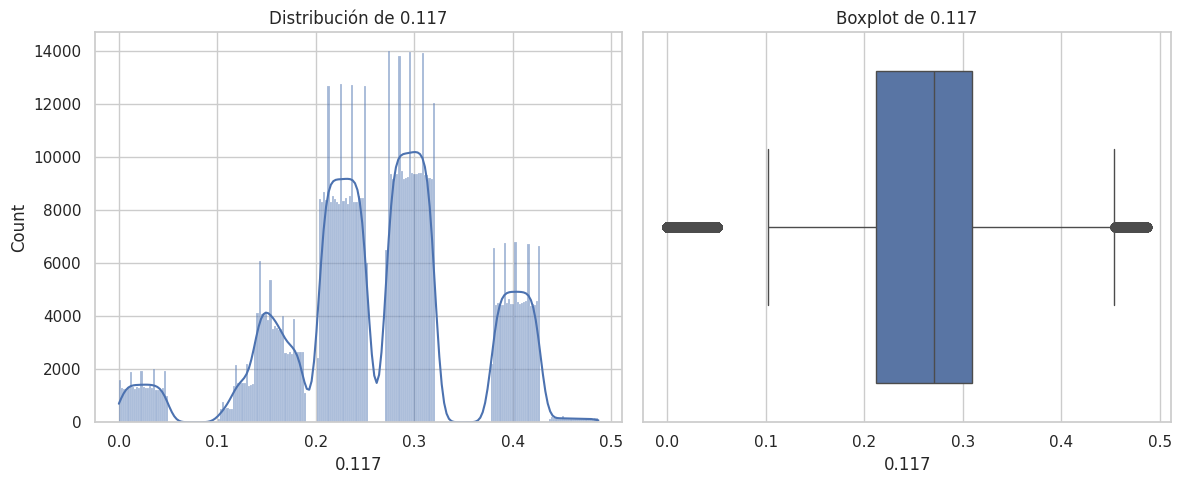


--------------------------------------------------
Análisis de la variable: 0.236
--------------------------------------------------

Estadísticas descriptivas:


count    692448.000000
mean          0.262087
std           0.058862
min           0.000000
25%           0.254000
50%           0.276000
75%           0.293000
max           0.320000
Name: 0.236, dtype: float64

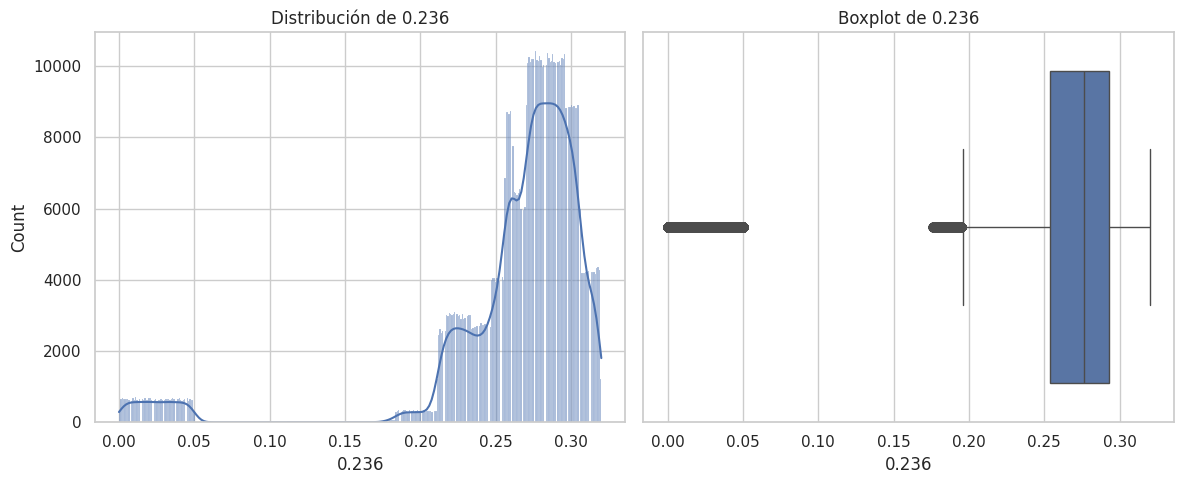

In [9]:
def analizar_variables_numericas(df, n_vars=3):
    """
    Analiza las variables numéricas del dataset y su relación con la variable objetivo
    
    Args:
        df (DataFrame): Dataset a analizar
        n_vars (int): Número máximo de variables a analizar
    """
    if df is None:
        return
    
    # Identificar variables numéricas (excluyendo ID)
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != 'ID']
    
    if not numeric_cols:
        print("\nNo se encontraron variables numéricas para analizar.")
        return
    
    print(f"\n{'='*50}")
    print(f"ANÁLISIS DE VARIABLES NUMÉRICAS (Top {min(n_vars, len(numeric_cols))})")
    print(f"{'='*50}")
    
    # Limitar el número de variables a analizar
    numeric_cols = numeric_cols[:n_vars]
    
    for col in numeric_cols:
        print(f"\n{'-'*50}")
        print(f"Análisis de la variable: {col}")
        print(f"{'-'*50}")
        
        # Estadísticas descriptivas
        stats = df[col].describe()
        print("\nEstadísticas descriptivas:")
        display(stats)
        
        # Visualización de la distribución
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribución de {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col].dropna())
        plt.title(f'Boxplot de {col}')
        
        plt.tight_layout()
        plt.show()
        
        # Relación con la variable objetivo (si existe)
        if 'RENDIMIENTO_GLOBAL' in df.columns:
            print(f"\nRelación entre {col} y RENDIMIENTO_GLOBAL:")
            
            # Estadísticas por grupo
            group_stats = df.groupby('RENDIMIENTO_GLOBAL')[col].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
            display(group_stats)
            
            # Visualización de la relación
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='RENDIMIENTO_GLOBAL', y=col, data=df)
            plt.title(f'Relación entre {col} y RENDIMIENTO_GLOBAL')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # ANOVA para verificar si hay diferencias significativas entre grupos
            try:
                from scipy import stats as scipy_stats
                
                # Crear grupos para ANOVA
                groups = []
                for category in df['RENDIMIENTO_GLOBAL'].unique():
                    group = df[df['RENDIMIENTO_GLOBAL'] == category][col].dropna()
                    groups.append(group)
                
                # Realizar ANOVA
                f_stat, p_value = scipy_stats.f_oneway(*groups)
                print(f"\nANOVA - Diferencias entre grupos:")
                print(f"F-statistic: {f_stat:.4f}")
                print(f"p-value: {p_value:.4f}")
                print(f"Interpretación: {'Hay diferencias significativas entre grupos (p<0.05)' if p_value < 0.05 else 'No hay diferencias significativas entre grupos (p>=0.05)'}")
            
            except Exception as e:
                print(f"No se pudo realizar ANOVA: {e}")

# Analizar variables numéricas en el dataset de entrenamiento
if train_df is not None:
    analizar_variables_numericas(train_df)